Задание параметров пиксельной маски

In [ ]:
x_min = 200
x_max = 600

y_min = 150
y_max = 450

h = 6

Загрузка изображения

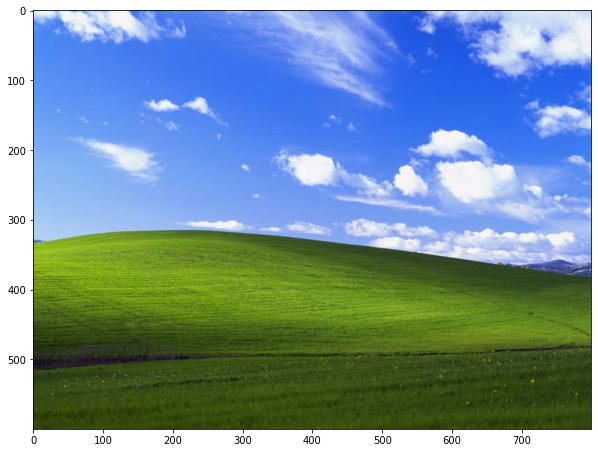

In [ ]:
import matplotlib.pyplot as plt
from skimage.io import imread

image = imread('https://upload.wikimedia.org/wikipedia/ru/1/1d/%D0%91%D0%B5%D0%B7%D0%BC%D1%8F%D1%82%D0%B5%D0%B6%D0%BD%D0%BE%D1%81%D1%82%D1%8C.png')

plt.figure(figsize=(10, 10))
plt.imshow(image)

Эта вспомогательная функция разбивает интервал на равные отрезки. Она нужна, так как размер интервала может не делиться нацело на количество отрезков, и нужно равномерно распределить остаток от деления между отрезками.

In [ ]:
import math

def interval_to_chunks(min, max, n):
    interval_size = max - min + 1
    quotient = math.floor(interval_size / n)
    remainder = interval_size - quotient * n
    result = [min]
    for i in range(n):
        chunk_size = quotient + 1 if remainder > 0 else quotient
        next_chunk_start = result[len(result) - 1] + chunk_size
        result.append(next_chunk_start)
        remainder -= 1
    return result

Проверка того, что функция работает правильно

In [ ]:
interval_to_chunks(1, 11, 3)

[1, 5, 9, 12]

Алгоритм пиксельной маски изображения

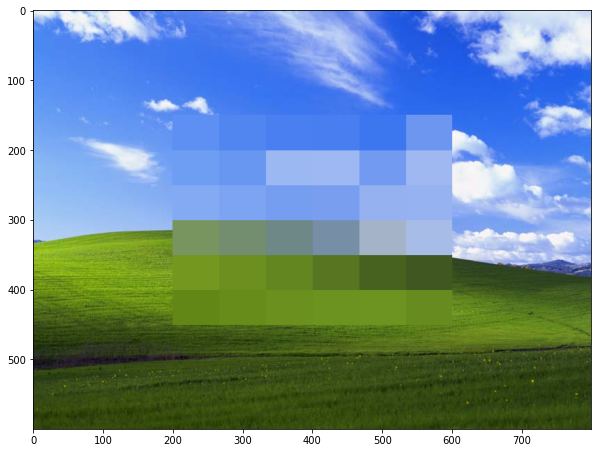

In [ ]:
import numpy as np

x_chunks = interval_to_chunks(x_min, x_max, h)
y_chunks = interval_to_chunks(y_min, y_max, h)

new_image = image.copy()

channels_count = image.shape[2]

for x_block in range(h):
    for y_block in range(h):
        block_size_x = x_chunks[x_block + 1] - x_chunks[x_block]
        block_size_y = y_chunks[y_block + 1] - y_chunks[y_block]
        block_area = block_size_x * block_size_y
        color_vector = np.zeros(channels_count, dtype=int)
        
        for x in range(x_chunks[x_block], x_chunks[x_block + 1]):
            for y in range(y_chunks[y_block], y_chunks[y_block + 1]):
                color_vector += image[y, x]

        color_vector = np.floor(color_vector / block_area)

        for x in range(x_chunks[x_block], x_chunks[x_block + 1]):
            for y in range(y_chunks[y_block], y_chunks[y_block + 1]):
                new_image[y, x] = color_vector

plt.figure(figsize=(10, 10))
plt.imshow(new_image)